The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


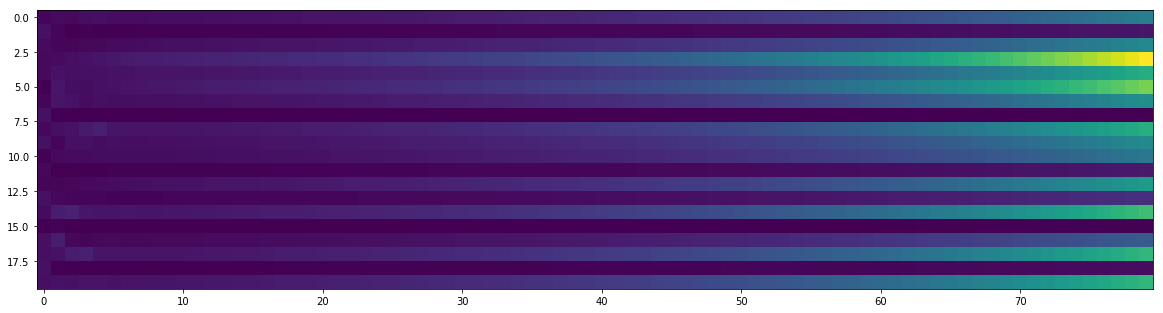

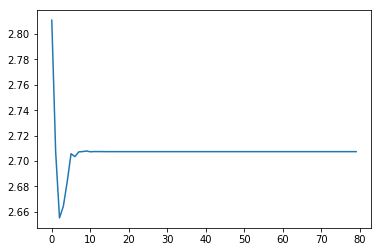

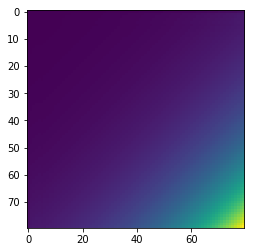

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.stats import entropy
from scipy import sparse



%matplotlib inline
%load_ext autoreload
%autoreload 2

dx = 0.2
l  = 80
n  = 20

C = np.zeros((n,l))

def rot(theta):
    R = np.zeros((n,n))
    for i in np.arange(n, step=2):
        R[i:i+2,i:i+2] = [
            [np.cos(theta[i/2]), - np.sin(theta[i/2])],
            [np.sin(theta[i/2]),   np.cos(theta[i/2])]
        ]
    return R





theta = np.random.sample(n/2)*np.pi*.2
# theta = np.ones(n/2)*.2

Q = ortho_group.rvs(n)

# W = np.dot(np.dot(Q,rot(theta)),Q.T)
# W = rot(theta)
# W = sparse.random(n,n,.12).A

C[:,0] = np.random.sample(n)
for i in range(1, l):
    C[:,i] = np.dot(W, C[:,i-1])



plt.figure(figsize=(20,20))
plt.imshow(C)
plt.show()


C_ = C - np.min(C, axis=0, keepdims=True) 
C_ = C_/np.max(C_, axis=0, keepdims=True)
C_ = C_/np.sum(C_, axis=0, keepdims=True)

plt.plot([entropy(c) for c in C_.T] )
plt.show()

plt.imshow(np.dot(C.T,C))
plt.show()


